# 1) Exploratory Data analysis

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.simplefilter(action='ignore')

In [3]:
df=pd.read_csv('diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
df.shape

(768, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.000,1.00000,3.0000,6.00000,9.0000,10.00000,13.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,85.000,99.00000,117.0000,140.25000,167.0000,181.00000,196.00000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,54.000,62.00000,72.0000,80.00000,88.0000,90.00000,106.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.000,0.00000,23.0000,32.00000,40.0000,44.00000,51.33000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.000,0.00000,30.5000,127.25000,210.0000,293.00000,519.90000,846.00
BMI,768.0,31.992578,7.884160,0.000,23.600,27.30000,32.0000,36.60000,41.5000,44.39500,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.165,0.24375,0.3725,0.62625,0.8786,1.13285,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,22.000,24.00000,29.0000,41.00000,51.0000,58.00000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000,0.00000,0.0000,1.00000,1.0000,1.00000,1.00000,1.00


In [10]:
df.duplicated().sum()

0

In [11]:
#unique values

df['Age'].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68], dtype=int64)

In [12]:
df['SkinThickness'].unique()

array([35, 29,  0, 23, 32, 45, 19, 47, 38, 30, 41, 33, 26, 15, 36, 11, 31,
       37, 42, 25, 18, 24, 39, 27, 21, 34, 10, 60, 13, 20, 22, 28, 54, 40,
       51, 56, 14, 17, 50, 44, 12, 46, 16,  7, 52, 43, 48,  8, 49, 63, 99],
      dtype=int64)

In [13]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [14]:
df['Outcome'].value_counts()*100/len(df)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

In [15]:
#Boxplot
#df[['Age']].boxplot()

In [16]:
#The histogram of age variable
#df['Age'].hist(edgecolor='black')

In [17]:
#df['Pregnancies'].hist(edgecolor='black')

In [18]:
#df['Glucose'].hist(edgecolor='black')

In [19]:
#df['Insulin'].hist(edgecolor='black')

In [20]:
diabetic=df[df['Outcome']==1]
non_diabetic=df[df['Outcome']==0]

In [21]:
''''plt.hist(diabetic['Age'],alpha=0.5,label='Diabetic')
plt.legend()
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age with diabetic people")
plt.show()'''

'\'plt.hist(diabetic[\'Age\'],alpha=0.5,label=\'Diabetic\')\nplt.legend()\nplt.xlabel("Age")\nplt.ylabel("Frequency")\nplt.title("Age with diabetic people")\nplt.show()'

In [22]:
''''plt.hist(non_diabetic['Age'],alpha=0.5,label='Non Diabetic')
plt.legend()
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age with non_diabetic people")
plt.show()'''

'\'plt.hist(non_diabetic[\'Age\'],alpha=0.5,label=\'Non Diabetic\')\nplt.legend()\nplt.xlabel("Age")\nplt.ylabel("Frequency")\nplt.title("Age with non_diabetic people")\nplt.show()'

In [23]:
max_age=df['Age'].max()
min_age=df['Age'].min()
print("Max age : ",max_age)
print("Min age : ",min_age)

Max age :  81
Min age :  21


In [24]:
''''fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(df.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(df.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(df.Glucose, bins = 20, ax=ax[1,0]) 
sns.distplot(df.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.distplot(df.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(df.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(df.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.distplot(df.BMI, bins = 20, ax=ax[3,1])'''

"'fig, ax = plt.subplots(4,2, figsize=(16,16))\nsns.distplot(df.Age, bins = 20, ax=ax[0,0]) \nsns.distplot(df.Pregnancies, bins = 20, ax=ax[0,1]) \nsns.distplot(df.Glucose, bins = 20, ax=ax[1,0]) \nsns.distplot(df.BloodPressure, bins = 20, ax=ax[1,1]) \nsns.distplot(df.SkinThickness, bins = 20, ax=ax[2,0])\nsns.distplot(df.Insulin, bins = 20, ax=ax[2,1])\nsns.distplot(df.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) \nsns.distplot(df.BMI, bins = 20, ax=ax[3,1])"

In [25]:
df.groupby('Outcome').agg({'Pregnancies':'mean'})

,Pregnancies
Outcome,
0,3.298000
1,4.865672


In [26]:
df.groupby('Outcome').agg({'Age':'max'})

,Age
Outcome,
0,81
1,70


In [27]:
df.groupby('Outcome').agg({'Age':'mean'})

,Age
Outcome,
0,31.190000
1,37.067164


In [28]:
df.groupby('Outcome').agg({'Insulin':'mean'})

,Insulin
Outcome,
0,68.792000
1,100.335821


In [29]:
df.groupby('Outcome').agg({'Insulin':'max'})

,Insulin
Outcome,
0,744
1,846


In [30]:
df.groupby('Outcome').agg({'Glucose':'mean'})

,Glucose
Outcome,
0,109.980000
1,141.257463


In [31]:
df.groupby('Outcome').agg({'Glucose':'max'})

,Glucose
Outcome,
0,197
1,199


In [32]:
df.groupby('Outcome').agg({'BMI':'mean'})

,BMI
Outcome,
0,30.304200
1,35.142537


In [33]:
''''f,ax=plt.subplots(1,2,figsize=(18,8))
df['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
#sns.countplot('Outcome',data=df,ax=ax[1])
#ax[1].set_title('Outcome')
plt.show()'''

"'f,ax=plt.subplots(1,2,figsize=(18,8))\ndf['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)\nax[0].set_title('target')\nax[0].set_ylabel('')\n#sns.countplot('Outcome',data=df,ax=ax[1])\n#ax[1].set_title('Outcome')\nplt.show()"

In [34]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


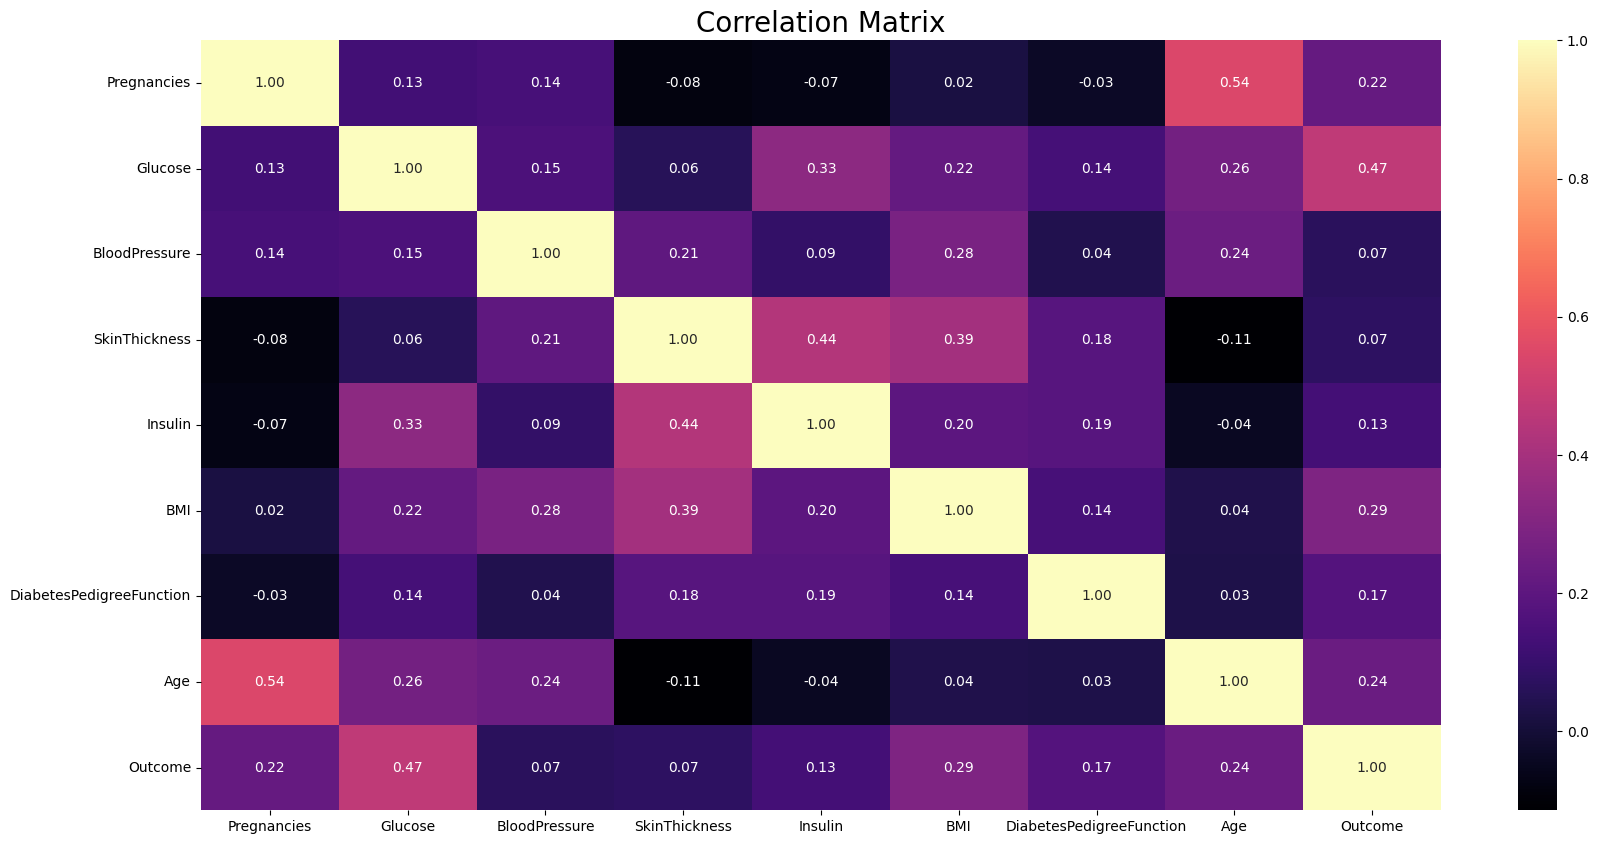

In [35]:
# Correlation matrix graph of the data set
f, ax = plt.subplots(figsize= [20,10])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

# 2)Data Preprocessing

# 2.1)Missing observation analysis

In [36]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [37]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [38]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [39]:
''''import missingno as mso
mso.bar(df)'''

"'import missingno as mso\nmso.bar(df)"

In [40]:
def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp
print(median_target('Age'))

   Outcome   Age
0        0  27.0
1        1  36.0


In [41]:
columns = df.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = median_target(i)[i][0]
    df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = median_target(i)[i][1]

In [42]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [43]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [44]:
#mso.bar(df)

# 2.2) Outlier observation analysis

In [45]:
# In the data set, there were asked whether there were any outlier observations compared to the 25% and 75% quarters.
# It was found to be an outlier observation.
for feature in df:
    
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    if df[(df[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


In [46]:
# The process of visualizing the Insulin variable with boxplot method was done. We find the outlier observations on the chart.
#import seaborn as sns
#sns.boxplot(x = df["Insulin"]);

In [47]:
#We conduct a stand alone observation review for the Insulin variable
#We suppress contradictory values
Q1 = df.Insulin.quantile(0.25)
Q3 = df.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df.loc[df["Insulin"] > upper,"Insulin"] = upper

In [48]:
#import seaborn as sns
#sns.boxplot(x = df["Insulin"]);

# 2.3) Local outlier factor(LOF)

In [49]:
# We determine outliers between all variables with the LOF method
from sklearn.neighbors import LocalOutlierFactor
lof =LocalOutlierFactor(n_neighbors= 10)
lof.fit_predict(df)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1

In [50]:
df_scores = lof.negative_outlier_factor_
np.sort(df_scores)[0:30]

array([-3.05893469, -2.37289269, -2.15297995, -2.09708735, -2.0772561 ,
       -1.95255968, -1.86384019, -1.74003158, -1.72703492, -1.71674689,
       -1.70343883, -1.6688722 , -1.64296768, -1.64190437, -1.61620872,
       -1.61369917, -1.60057603, -1.5988774 , -1.59608032, -1.57027568,
       -1.55876022, -1.55674614, -1.51852389, -1.50843907, -1.50280943,
       -1.50160698, -1.48391514, -1.4752983 , -1.4713427 , -1.47006248])

In [51]:
#We choose the threshold value according to lof scores
threshold = np.sort(df_scores)[7]
threshold

-1.740031580305444

In [52]:
#We delete those that are higher than the threshold
outlier = df_scores > threshold
df = df[outlier]

In [53]:
df.shape

(760, 9)

In [54]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [57]:
import time

In [58]:

x=df.iloc[:,0:8].values
y=df.iloc[:,-1].values

In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.3,random_state=0,shuffle=True)

In [61]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

# Naive Bayes

In [62]:
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
start_time=time.time()
clf.fit(x_train,y_train)
end_time=time.time()
y_pred=clf.predict(x_test)
y_pred

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0], dtype=int64)

In [63]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,classification_report,roc_curve,auc
ac=accuracy_score(y_pred,y_test)
cm=confusion_matrix(y_pred,y_test)
sensitivity=recall_score(y_pred,y_test)
cr=classification_report(y_pred,y_test)
error_rate = (cm[0][1] + cm[1][0]) / float(cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])
fpr,tpr,thresholds=roc_curve(y_pred,y_test)
auc_score=auc(fpr,tpr)

print("Accuracy score : \n",ac)
print("Confusion matrix : \n",cm)
print("Sensitivity : \n",sensitivity)
print("Error rate : \n",error_rate)
print("classification report :\n",cr)
print("auc score :\n",auc_score)

Accuracy score : 
 0.8070175438596491
Confusion matrix : 
 [[120  15]
 [ 29  64]]
Sensitivity : 
 0.6881720430107527
Error rate : 
 0.19298245614035087
classification report :
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       135
           1       0.81      0.69      0.74        93

    accuracy                           0.81       228
   macro avg       0.81      0.79      0.79       228
weighted avg       0.81      0.81      0.80       228

auc score :
 0.7885304659498208


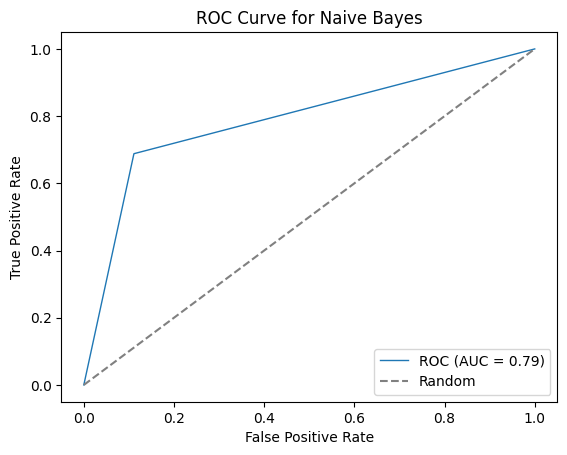

In [64]:

plt.plot(fpr, tpr, lw=1, label='ROC (AUC = %0.2f)' % (auc_score))
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes')
plt.legend(loc="lower right")


Epoch 1, Loss: 0.4831
Epoch 2, Loss: 0.4831
Epoch 3, Loss: 0.4831
Epoch 4, Loss: 0.4831
Epoch 5, Loss: 0.4831
Epoch 6, Loss: 0.4831
Epoch 7, Loss: 0.4831
Epoch 8, Loss: 0.4831
Epoch 9, Loss: 0.4831
Epoch 10, Loss: 0.4831
Epoch 11, Loss: 0.4831
Epoch 12, Loss: 0.4831
Epoch 13, Loss: 0.4831
Epoch 14, Loss: 0.4831
Epoch 15, Loss: 0.4831
Epoch 16, Loss: 0.4831
Epoch 17, Loss: 0.4831
Epoch 18, Loss: 0.4831
Epoch 19, Loss: 0.4831
Epoch 20, Loss: 0.4831


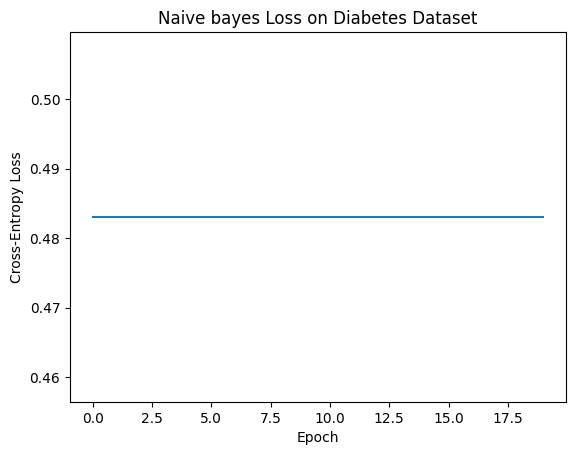

In [65]:

from sklearn.metrics import log_loss
losses = []
for epoch in range(1, 21):
    clf.fit(x_train, y_train)
    y_pred = clf.predict_proba(x_train)
    loss = log_loss(y_train, y_pred)
    losses.append(loss)
    print(f'Epoch {epoch}, Loss: {loss:.4f}')

plt.plot(losses)
plt.title('Naive bayes Loss on Diabetes Dataset')
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Loss')
plt.show()

In [66]:


X = df.drop('Outcome', axis=1)
y = df['Outcome']
columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

for feature in columns:
    X_ablated = X.drop(feature, axis=1)
    clf.fit(X_ablated, y)
    acc_ablated = accuracy_score(y, clf.predict(X_ablated))
    print(f'{feature} removed: accuracy = {acc_ablated:.4f} (compared to full = {ac:.4f})')

Pregnancies removed: accuracy = 0.8026 (compared to full = 0.8070)
Glucose removed: accuracy = 0.8092 (compared to full = 0.8070)
BloodPressure removed: accuracy = 0.8158 (compared to full = 0.8070)
SkinThickness removed: accuracy = 0.8039 (compared to full = 0.8070)
Insulin removed: accuracy = 0.7671 (compared to full = 0.8070)
BMI removed: accuracy = 0.8132 (compared to full = 0.8070)
DiabetesPedigreeFunction removed: accuracy = 0.8053 (compared to full = 0.8070)
Age removed: accuracy = 0.8118 (compared to full = 0.8070)


In [67]:
cm_time=end_time-start_time
cm_time

0.002000093460083008

# Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
s=time.time()
lr.fit(x_train,y_train)
e=time.time()
y_pred=lr.predict(x_test)
y_pred

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0], dtype=int64)

In [69]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,classification_report,roc_curve,auc
ac=accuracy_score(y_pred,y_test)
cm=confusion_matrix(y_pred,y_test)
sensitivity=recall_score(y_pred,y_test)
cr=classification_report(y_pred,y_test)
error_rate = (cm[0][1] + cm[1][0]) / float(cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])
fpr,tpr,thresholds=roc_curve(y_pred,y_test)
auc_score=auc(fpr,tpr)

print("Accuracy score : \n",ac)
print("Confusion matrix : \n",cm)
print("Sensitivity : \n",sensitivity)
print("Error rate : \n",error_rate)
print("classification report :\n",cr)
print("auc score :\n",auc_score)

Accuracy score : 
 0.8157894736842105
Confusion matrix : 
 [[124  17]
 [ 25  62]]
Sensitivity : 
 0.7126436781609196
Error rate : 
 0.18421052631578946
classification report :
               precision    recall  f1-score   support

           0       0.83      0.88      0.86       141
           1       0.78      0.71      0.75        87

    accuracy                           0.82       228
   macro avg       0.81      0.80      0.80       228
weighted avg       0.81      0.82      0.81       228

auc score :
 0.7960381511371974


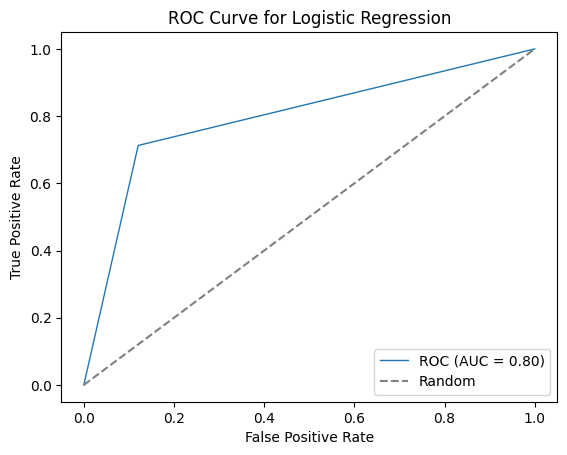

In [70]:

plt.plot(fpr, tpr, lw=1, label='ROC (AUC = %0.2f)' % (auc_score))
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="lower right")

In [71]:

X = df.drop('Outcome', axis=1)
y = df['Outcome']
columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

for feature in columns:
    X_ablated = X.drop(feature, axis=1)
    lr.fit(X_ablated, y)
    acc_ablated = accuracy_score(y, lr.predict(X_ablated))
    print(f'{feature} removed: accuracy = {acc_ablated:.4f} (compared to full = {ac:.4f})')


Pregnancies removed: accuracy = 0.7961 (compared to full = 0.8158)
Glucose removed: accuracy = 0.7974 (compared to full = 0.8158)
BloodPressure removed: accuracy = 0.8105 (compared to full = 0.8158)
SkinThickness removed: accuracy = 0.7921 (compared to full = 0.8158)
Insulin removed: accuracy = 0.7671 (compared to full = 0.8158)
BMI removed: accuracy = 0.8118 (compared to full = 0.8158)
DiabetesPedigreeFunction removed: accuracy = 0.8079 (compared to full = 0.8158)
Age removed: accuracy = 0.8092 (compared to full = 0.8158)


Epoch 1, Loss: 0.4173
Epoch 2, Loss: 0.4173
Epoch 3, Loss: 0.4173
Epoch 4, Loss: 0.4173
Epoch 5, Loss: 0.4173
Epoch 6, Loss: 0.4173
Epoch 7, Loss: 0.4173
Epoch 8, Loss: 0.4173
Epoch 9, Loss: 0.4173
Epoch 10, Loss: 0.4173
Epoch 11, Loss: 0.4173
Epoch 12, Loss: 0.4173
Epoch 13, Loss: 0.4173
Epoch 14, Loss: 0.4173
Epoch 15, Loss: 0.4173
Epoch 16, Loss: 0.4173
Epoch 17, Loss: 0.4173
Epoch 18, Loss: 0.4173
Epoch 19, Loss: 0.4173
Epoch 20, Loss: 0.4173


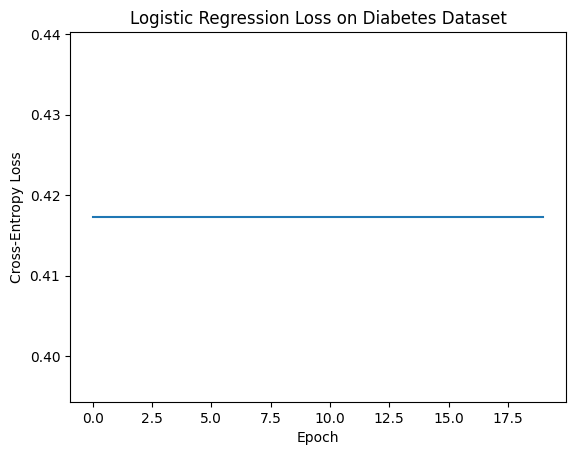

In [72]:

losses = []
for epoch in range(1, 21):
    lr.fit(x_train, y_train)
    y_pred = lr.predict_proba(x_train)
    loss = log_loss(y_train, y_pred)
    losses.append(loss)
    print(f'Epoch {epoch}, Loss: {loss:.4f}')

plt.plot(losses)
plt.title('Logistic Regression Loss on Diabetes Dataset')
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Loss')
plt.show()



In [73]:
c=e-s
c

0.0049076080322265625

# SVM

In [75]:
from sklearn.svm import SVC
s=SVC(kernel='linear',C=1.0,probability=True)
st=time.time()
s.fit(x_train,y_train)
e=time.time()
y_pred=s.predict(x_test)
y_pred

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

In [76]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,classification_report,roc_curve,auc
ac=accuracy_score(y_pred,y_test)
cm=confusion_matrix(y_pred,y_test)
sensitivity=recall_score(y_pred,y_test)
cr=classification_report(y_pred,y_test)
error_rate = (cm[0][1] + cm[1][0]) / float(cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])
fpr,tpr,thresholds=roc_curve(y_pred,y_test)
auc_score=auc(fpr,tpr)

print("Accuracy score : \n",ac)
print("Confusion matrix : \n",cm)
print("Sensitivity : \n",sensitivity)
print("Error rate : \n",error_rate)
print("classification report :\n",cr)
print("auc score :\n",auc_score)

Accuracy score : 
 0.8201754385964912
Confusion matrix : 
 [[115   7]
 [ 34  72]]
Sensitivity : 
 0.6792452830188679
Error rate : 
 0.17982456140350878
classification report :
               precision    recall  f1-score   support

           0       0.77      0.94      0.85       122
           1       0.91      0.68      0.78       106

    accuracy                           0.82       228
   macro avg       0.84      0.81      0.81       228
weighted avg       0.84      0.82      0.82       228

auc score :
 0.81093411691927


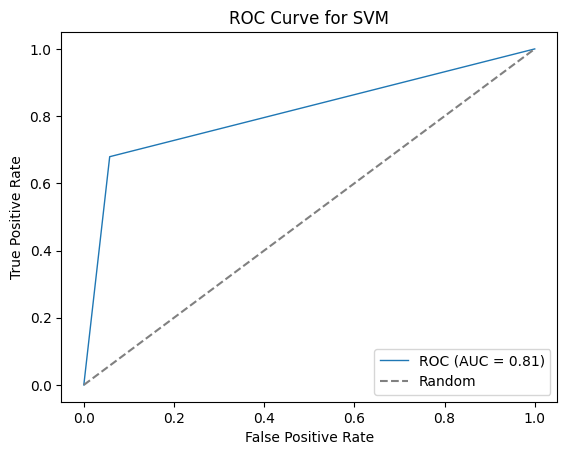

In [77]:

plt.plot(fpr, tpr, lw=1, label='ROC (AUC = %0.2f)' % (auc_score))
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.legend(loc="lower right")

Epoch 1, Loss: 0.4498
Epoch 2, Loss: 0.4493
Epoch 3, Loss: 0.4492
Epoch 4, Loss: 0.4493
Epoch 5, Loss: 0.4492
Epoch 6, Loss: 0.4491
Epoch 7, Loss: 0.4494
Epoch 8, Loss: 0.4492
Epoch 9, Loss: 0.4491
Epoch 10, Loss: 0.4492
Epoch 11, Loss: 0.4491
Epoch 12, Loss: 0.4494
Epoch 13, Loss: 0.4491
Epoch 14, Loss: 0.4493
Epoch 15, Loss: 0.4491
Epoch 16, Loss: 0.4492
Epoch 17, Loss: 0.4493
Epoch 18, Loss: 0.4493
Epoch 19, Loss: 0.4494
Epoch 20, Loss: 0.4492


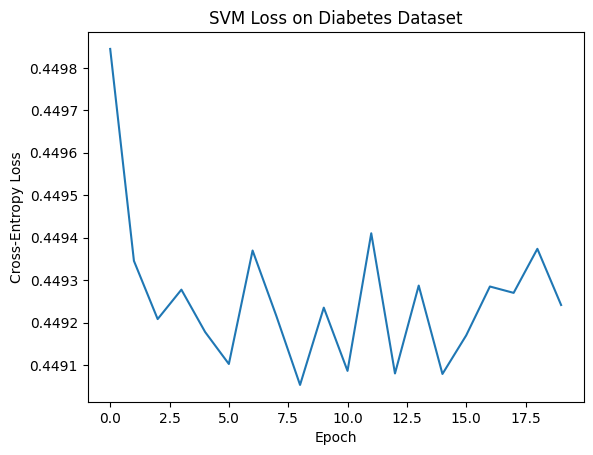

In [78]:

losses = []
for epoch in range(1, 21):
    s.fit(x_train, y_train)
    y_pred = s.predict_proba(x_train)
    loss = log_loss(y_train, y_pred)
    losses.append(loss)
    print(f'Epoch {epoch}, Loss: {loss:.4f}')

plt.plot(losses)
plt.title('SVM Loss on Diabetes Dataset')
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Loss')
plt.show()

In [79]:


X = df.drop('Outcome', axis=1)
y = df['Outcome']
columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']


for feature in columns:
    X_ablated = X.drop(feature, axis=1)
    s.fit(X_ablated, y)
    acc_ablated = accuracy_score(y, s.predict(X_ablated))
    print(f'{feature} removed: accuracy = {acc_ablated:.4f} (compared to full = {ac:.4f})')

Pregnancies removed: accuracy = 0.8342 (compared to full = 0.8202)
Glucose removed: accuracy = 0.8500 (compared to full = 0.8202)
BloodPressure removed: accuracy = 0.8342 (compared to full = 0.8202)
SkinThickness removed: accuracy = 0.8158 (compared to full = 0.8202)
Insulin removed: accuracy = 0.7632 (compared to full = 0.8202)
BMI removed: accuracy = 0.8382 (compared to full = 0.8202)
DiabetesPedigreeFunction removed: accuracy = 0.8382 (compared to full = 0.8202)
Age removed: accuracy = 0.8276 (compared to full = 0.8202)


In [80]:
c=e-st
c

0.05496501922607422

# Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=1)
s=time.time()
rf.fit(x_train,y_train)
e=time.time()
y_pred=rf.predict(x_test)

In [82]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,classification_report,roc_curve,auc
ac=accuracy_score(y_pred,y_test)
cm=confusion_matrix(y_pred,y_test)
sensitivity=recall_score(y_pred,y_test)
cr=classification_report(y_pred,y_test)
error_rate = (cm[0][1] + cm[1][0]) / float(cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])
fpr,tpr,thresholds=roc_curve(y_pred,y_test)
auc_score=auc(fpr,tpr)

print("Accuracy score : \n",ac)
print("Confusion matrix : \n",cm)
print("Sensitivity : \n",sensitivity)
print("Error rate : \n",error_rate)
print("classification report :\n",cr)
print("auc score :\n",auc_score)

Accuracy score : 
 0.8070175438596491
Confusion matrix : 
 [[126  21]
 [ 23  58]]
Sensitivity : 
 0.7160493827160493
Error rate : 
 0.19298245614035087
classification report :
               precision    recall  f1-score   support

           0       0.85      0.86      0.85       147
           1       0.73      0.72      0.73        81

    accuracy                           0.81       228
   macro avg       0.79      0.79      0.79       228
weighted avg       0.81      0.81      0.81       228

auc score :
 0.7865961199294533


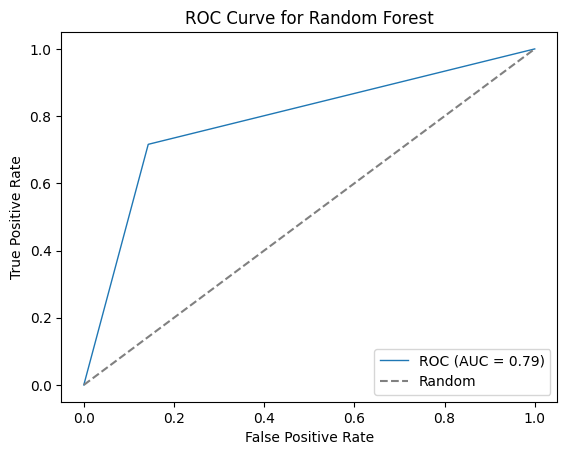

In [83]:

plt.plot(fpr, tpr, lw=1, label='ROC (AUC = %0.2f)' % (auc_score))
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc="lower right")

Epoch 1, Loss: 2.9215
Epoch 2, Loss: 2.9864
Epoch 3, Loss: 2.3372
Epoch 4, Loss: 2.5320
Epoch 5, Loss: 2.4021
Epoch 6, Loss: 2.2723
Epoch 7, Loss: 2.9215
Epoch 8, Loss: 3.1163
Epoch 9, Loss: 2.7917
Epoch 10, Loss: 2.2074
Epoch 11, Loss: 2.0775
Epoch 12, Loss: 1.8178
Epoch 13, Loss: 2.6618
Epoch 14, Loss: 2.8566
Epoch 15, Loss: 2.7267
Epoch 16, Loss: 3.2461
Epoch 17, Loss: 2.9215
Epoch 18, Loss: 2.4671
Epoch 19, Loss: 2.8566
Epoch 20, Loss: 3.2461


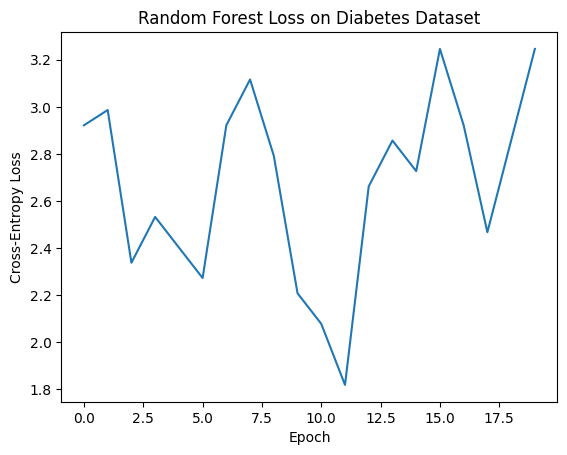

In [84]:

losses = []
for epoch in range(1, 21):
    rf.fit(x_train, y_train)
    y_pred = rf.predict_proba(x_train)
    loss = log_loss(y_train, y_pred)
    losses.append(loss)
    print(f'Epoch {epoch}, Loss: {loss:.4f}')

plt.plot(losses)
plt.title('Random Forest Loss on Diabetes Dataset')
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Loss')
plt.show()

In [85]:

X = df.drop('Outcome', axis=1)
y = df['Outcome']
columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

for feature in columns:
    X_ablated = X.drop(feature, axis=1)
    rf.fit(X_ablated, y)
    acc_ablated = accuracy_score(y, rf.predict(X_ablated))
    print(f'{feature} removed: accuracy = {acc_ablated:.4f} (compared to full = {ac:.4f})')

Pregnancies removed: accuracy = 0.9303 (compared to full = 0.8070)
Glucose removed: accuracy = 0.9158 (compared to full = 0.8070)
BloodPressure removed: accuracy = 0.9132 (compared to full = 0.8070)
SkinThickness removed: accuracy = 0.9263 (compared to full = 0.8070)
Insulin removed: accuracy = 0.8947 (compared to full = 0.8070)
BMI removed: accuracy = 0.9421 (compared to full = 0.8070)
DiabetesPedigreeFunction removed: accuracy = 0.9303 (compared to full = 0.8070)
Age removed: accuracy = 0.9224 (compared to full = 0.8070)


In [86]:
c=e-s
c

0.0049970149993896484